![Datahack](images/datahack_logo.PNG)

![Conferencias](images/conferencias_jueves_big_data.PNG)

Tras la presentación que hemos visto, vamos ahora a hacer algunos ejemplos con código en Python para demostrar el potencial de este lenguaje como herramienta de Análisis de Datos y Visualización.

No podemos olvidar la slides sobre el **proceso de ciencia de datos**, tengámosla en mente:

***

![Proceso ciencia de datos](images/proceso_ciencia_datos.png)

----
# Ejemplo: Análisis de importaciones, torres eléctricas metálicas
----
En este ejemplo, usaremos las herramientas vistas en la presentación, aplicadas a datos reales que podrían llegar por una petición de un trabajo de un cliente. 

En concreto, el **problema** que tendría el cliente es el de la entrada en un mercado concreto en un país, en un sector concreto. El **sector** sería el de fabricación de torres metálicas para líneas de transmisión de electricidad

Procederemos a hacer todos los pasos mencionados antes, partiendo de una fuente de datos, que en este caso sería la **aduana del país**, que bajo su ley de transparencia, puede hacer públicos determinados datos de las importaciones y exportaciones,
por requerimiento individual de toda persona interesada.

La fases previas de extracción procesado y limpieza, a veces son más tediosas que el propio análisis, e incluso que el modelado posterior. Pero realmente está en esa fase parte de la posible solución final que se encuentre. Y siempre teniendo presente en todo momento el problema que se quiere resolver.

En este notebook veremos lo siguiente:
- [Carga de librerías](#carga_librerias) 
- [Primer vistazo con **pandas_profiling**](#pandas_profiling)
- [Relleno de **missing**](#fill_missing)
- [Unión de valores de varias columnas y eliminación de columnas](#union_col_drop)
- [Reemplazo de códigos por su significado](#reemplazo_cod)
- [Expresiones regulares (**Regular Expression**)](#regex)
- [Gráficas de **Seaborn**: **boxplot** y **swarmplot**](#graficas_boxplot_swarmplot)
- [Conversión de fechas](#conversion_fechas)
- [Filtrado por rango de la variable nueva **ratio**](#filtrado_rango)
- [Segundo vistazo con **pandas_profiling**,  pero esta vez los datos más limpios](#pandas_profiling2)
- [Cargamos más datos: precios históricos del **acero** y del **zinc**](#acero_zinc)
- [Gráfica completa de Importes, pesos y precios](#grafica_importes_pesos_precio)
- [Gráfica completa de Exportadores, pesos y precios](#grafica_exportadores_pesos_precio)
    - [Tabla **pivot** de los exportadores](#tabla_pivot)
- [Lista de los mayores exportadores](#mayores_exportadores)
- [Países de origen de las mercancías](#paises_origen_importaciones)
- [Unión de datasets con **merge**](#merge_dataset)
- [Gráfica de **seaborn**: **Pairgrid** para estudiar relaciones entre variables](#grafica_pairgrid)

Lo primero es cargar las librerías, primero las que usaremos seguro. Si más adelante necesitamos alguna más, la cargaremos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A continuación vamos a cargar el archivo csv, que en este caso procede de un organismo público. La mayoría de las veces lo da el cliente, pues son datos internos de la empresa. Lo que sí suele ser común es que los datos vengan de forma desordenada, y no de la forma que vamos a necesitar para hacer nuestro análisis, y si se requiere, posteriormente para nuestro modelo.

Te puedes encontrar por ejemplo:
- Datos en forma de csv, partidos, a veces comprimidos, en un número importante de ellos. Me han llegado a pasar en alguna ocasión hasta 3000 archivos. Una de las primeras cosas que se hace es ver cómo juntarlos para tener un único o unos pocos datasets
- Conexión a bases de datos internas. Para extraer habrá que hacer queries sobre esa base de datos, lo más posible usando SQL
- Conexión a softwares internos del cliente. Para extraer este tipo de datos se suelen usar API para descargar normalmente archivos json

He puesto estos estos tres ejemplos, y para los tres hay librerías adecuadas de Python para automitizar este trabajo.

Pero volviendo a nuestro ejemplo, tenemos en nuestro caso un csv.


In [2]:
datos = pd.read_csv('./data/AE007T0000953_2007_2013 933_2014_2016 Towers.csv', sep=';')

Vamos a ver qué tamaño tiene y qué hay dentro

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Columns: 103 entries, FECHA_ACEPTACION to PRECIO_UNITARIO_CIF
dtypes: float64(31), int64(27), object(45)
memory usage: 1.3+ MB


In [4]:
datos.head()

,FECHA_ACEPTACION,ADUANA,NOMBRE_IMPORTADOR,RUT_IMPORTADOR,DIG_VERIF_IMPORTADOR,DIREC,CODCOMUN,PAIS_ORIGEN,PA_ADQ,PUERTO_EMBARQUE,...,SIGNO_VALOR3,MONTO_IMPUESTO_OTRO3,PORCENTAJE_OTRO4,CODIGO_CUENTA_OTRO4,SIGNO_VALOR4,MONTO_IMPUESTO_OTRO4,VALOR_FOB_ITEM,VALOR_FLETE_ITEM,VALOR_SEGURO_ITEM,PRECIO_UNITARIO_CIF
0,01/12/2007 16:44:15,67,EMBALAJES PUERTO MONTT S.A.,"78,247,420",0,"RUTA 5 SUR , KM. 6,5 L.SN JOAQUIN, PUERTO MONTT","10,101",224,224,262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/25/2007 17:26:27,33,A.J.INGENIEROS LTDA,"96,556,620",1,"LA DIVISA 0340, SAN BERNARDO","13,401",224,224,262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/2007 13:45:09,55,ALUSA INGENIERIA LIMITDA,"76,281,400",5,"AV. APOQUINDO 3669 OF 302, LAS CONDES","13,114",220,220,899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03/01/2007 13:45:09,55,ALUSA INGENIERIA LIMITDA,"76,281,400",5,"AV. APOQUINDO 3669 OF 302, LAS CONDES","13,114",220,220,899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03/01/2007 13:45:09,55,ALUSA INGENIERIA LIMITDA,"76,281,400",5,"AV. APOQUINDO 3669 OF 302, LAS CONDES","13,114",220,220,899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hay demasiados campos, muchos no nos interesan, vamos a reducir un poco y quedarnos los que nos vienen bien para nuestro análisis. Para la selección, he creado un csv con los campos a usar, que cargo a continuación

In [3]:
L2 = pd.read_csv('./data/Seleccion de campos L2.csv')

In [6]:
L2

,Campo
0,FECHA_ACEPTACION
1,ADUANA
2,PAIS_ORIGEN
3,PA_ADQ
4,PUERTO_DESEMBARQUE
5,TOTAL_PESO
6,VALOR_CIF
7,CODIGO_ARANCEL
8,IDENTIFICACION_BULTOS1
9,IDENTIFICACION_BULTOS2


In [4]:
datos = datos[L2.Campo].copy()

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 26 columns):
FECHA_ACEPTACION          1600 non-null object
ADUANA                    1600 non-null int64
PAIS_ORIGEN               1600 non-null int64
PA_ADQ                    1600 non-null int64
PUERTO_DESEMBARQUE        1600 non-null int64
TOTAL_PESO                1600 non-null object
VALOR_CIF                 1600 non-null object
CODIGO_ARANCEL            1600 non-null int64
IDENTIFICACION_BULTOS1    1600 non-null object
IDENTIFICACION_BULTOS2    592 non-null object
IDENTIFICACION_BULTOS3    238 non-null object
IDENTIFICACION_BULTOS4    116 non-null object
IDENTIFICACION_BULTOS5    51 non-null object
IDENTIFICACION_BULTOS6    18 non-null object
NOMBRE_MERCANCIA          1600 non-null object
ATRIBUTO1                 1600 non-null object
ATRIBUTO2                 1527 non-null object
ATRIBUTO3                 1085 non-null object
ATRIBUTO4                 487 non-null object
ATRIBUTO5    

Vamos a ver una librería muy útil para tener una visión de conjunto de un dataset. Además hace análisis por variable, e incluso marca como rechazadas las que considera que no aportan, según su criterio. Puede que no coincida con el nuestro.

Importamos la librería
<a id='pandas_profiling'></a>

In [5]:
import pandas_profiling as pp

C:\Users\Lenovo-PC\Anaconda3\envs\datahack\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


Y ahora la usamos

In [6]:
pp.ProfileReport(datos)

Number of variables,26
Number of observations,1600
Total Missing (%),27.5%
Total size in memory,325.1 KiB
Average record size in memory,208.1 B
Numeric,6
Categorical,18
Boolean,0
Date,0
Text (Unique),0
Rejected,2


Los datos los tenemos todavía muy sucios, el informe no nos da el valor que dará cuando ya esté más limpio el dataset. Esta herramienta es muy útil para tener un primer vistazo completo de un dataset que recibamos para analizar.

Hemos visto que tenemos muchos **"missing"** (valores nulos), que en nuestro caso coinciden en columnas tipo **"object"**, es decir, textos. En este caso vamos a reemplazarlas por una cadena vacía.

El rellenado de **"missing"** puede complicarse mucho. A modo de muestra, se puede ver a continuación las opciones que tiene **pandas** para rellenar:

![fillna](images/pd.fillna.PNG)
<a id='fill_missing'></a>

Otra opción podría ser **interpolar**, o incluso hacer un modelo de **machine learning** para completar esos valores. Eso va a depender de cuántos hay, cómo son, cómo influyen en lo que estoy buscando, si tengo información repetida en otra variable que me pueda ayuda a rellenar. O incluso, si no aportan, eliminamos el dato. Siempre con mucha precaución.

Para hacernos una idea también del potencial del método **interpolate** de **pandas**, a continuación la ayuda para usarlo con todas las opciones. Son muy amplias !!

![interpolate](images/pd.interpolate.PNG)

In [7]:
datos = datos.fillna(' ')

<a id='union_col_drop'></a>
Vamos a hacer unos arreglos a algunas columnas, que realmente tienen la misma información, pero separada entre varias, por un problema en el tamaño de campos que tenría el organismo. Lo hacemos para varias columnas

In [8]:
datos['identificacion'] = datos.loc[:, 'IDENTIFICACION_BULTOS1':'IDENTIFICACION_BULTOS6'].sum(axis=1)

Y le vamos a quitar los espacios en blanco

In [9]:
datos['identificacion'] = datos['identificacion'].apply(lambda x: " ".join(x.split()))

Y quitamos las columnas que ya no necesitamos

In [10]:
datos = datos.drop(['IDENTIFICACION_BULTOS1',
                    'IDENTIFICACION_BULTOS2',
                    'IDENTIFICACION_BULTOS3',
                    'IDENTIFICACION_BULTOS4',
                    'IDENTIFICACION_BULTOS5',
                    'IDENTIFICACION_BULTOS6',], axis=1)

In [15]:
datos.columns

Index(['FECHA_ACEPTACION', 'ADUANA', 'PAIS_ORIGEN', 'PA_ADQ',
       'PUERTO_DESEMBARQUE', 'TOTAL_PESO', 'VALOR_CIF', 'CODIGO_ARANCEL',
       'NOMBRE_MERCANCIA', 'ATRIBUTO1', 'ATRIBUTO2', 'ATRIBUTO3', 'ATRIBUTO4',
       'ATRIBUTO5', 'ATRIBUTO6', 'NOMBRE_IMPORTADOR', 'REGIMEN_IMPORTACION',
       'CODIGO_MONEDA', 'NRO_TOTAL_ITEMS', 'VALOR_SEGURO', 'identificacion'],
      dtype='object')

Vamos a hacer lo mismo con el nombre de la mercancia y sus atributos, lo juntamos todo en un campo. Lo hago todo de golpe

In [11]:
datos['descripcion'] = datos.loc[:, 'NOMBRE_MERCANCIA':'ATRIBUTO6'].sum(axis=1)
datos['descripcion'] = datos['descripcion'].apply(lambda x: " ".join(x.split()))
datos = datos.drop(['NOMBRE_MERCANCIA',
                    'ATRIBUTO1',
                    'ATRIBUTO2',
                    'ATRIBUTO3',
                    'ATRIBUTO4',
                    'ATRIBUTO5',
                    'ATRIBUTO6'], axis=1)
datos.columns

Index(['FECHA_ACEPTACION', 'ADUANA', 'PAIS_ORIGEN', 'PA_ADQ',
       'PUERTO_DESEMBARQUE', 'TOTAL_PESO', 'VALOR_CIF', 'CODIGO_ARANCEL',
       'NOMBRE_IMPORTADOR', 'REGIMEN_IMPORTACION', 'CODIGO_MONEDA',
       'NRO_TOTAL_ITEMS', 'VALOR_SEGURO', 'identificacion', 'descripcion'],
      dtype='object')

Tenemos datos codificados con números. Este organismo también facilita metadatos para saber qué significa cada código. Vamos a cargar los metadatos, para luego reemplazarlos en el dataframe

In [12]:
codigo_aduana = pd.read_csv('./data/Codigo Aduana.csv', encoding='ISO-8859-1', sep=';')
codigo_country = pd.read_csv('./data/Codigo Country.csv', encoding='ISO-8859-1', sep=';')
codigo_desembarque = pd.read_csv('./data/Codigo Puerto Desembarque.csv', encoding='ISO-8859-1', sep=';')
codigo_region = pd.read_csv('./data/Codigo Puerto Desembarque.csv', encoding='ISO-8859-1', sep=';')
codigo_reg_imp = pd.read_csv('./data/Codigo Reg Importacion.csv', encoding='ISO-8859-1', sep=';')
codigo_monedas = pd.read_csv('./data/Codigo Monedas.csv', encoding='ISO-8859-1', sep=';')

In [18]:
whos

Variable             Type         Data/Info
-------------------------------------------
L2                   DataFrame                         Camp<...>5            VALOR_SEGURO
codigo_aduana        DataFrame        Cod                 A<...>92           PUNTA ARENAS
codigo_country       DataFrame         Country_Code        <...>n\n[236 rows x 2 columns]
codigo_desembarque   DataFrame        Code                 <...>                   Décima
codigo_monedas       DataFrame        Code         Currency<...> PESO CL            CHILE
codigo_reg_imp       DataFrame        Code                 <...>ICA CH...      AAEECH-JAP
codigo_region        DataFrame        Code                 <...>                   Décima
datos                DataFrame             FECHA_ACEPTACION<...>n[1600 rows x 15 columns]
np                   module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                   module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt         

<a id='reemplazo_cod'></a>
Vamos a reemplazar los códigos por los valores reales de los campos

Primero construimos los diccionarios:

In [13]:
codigo_aduana.index = codigo_aduana.Cod
di_codigo_aduana = codigo_aduana['Aduana'].to_dict()

codigo_country.index = codigo_country.Country_Code
di_codigo_country = codigo_country['Country'].to_dict()

codigo_desembarque.index = codigo_desembarque.Code
di_codigo_desembarque = codigo_desembarque['Port'].to_dict()

codigo_region.index = codigo_region.Code
di_codigo_region = codigo_region['Region'].to_dict()

codigo_monedas.index = codigo_monedas.Code
di_codigo_monedas = codigo_monedas['Currency'].to_dict()

Y ahora reemplazamos valores en el **dataframe**

In [14]:
datos['Aduana'] = datos['ADUANA'].replace(di_codigo_aduana)
datos = datos.drop(['ADUANA'], axis=1)

datos['Pais_Origen'] = datos['PAIS_ORIGEN'].replace(di_codigo_country)
datos = datos.drop(['PAIS_ORIGEN'], axis=1)

datos['Pais_Adq'] = datos['PA_ADQ'].replace(di_codigo_country)
datos = datos.drop(['PA_ADQ'], axis=1)

datos['REGION'] = datos['PUERTO_DESEMBARQUE']
datos['Puerto_Desembarque'] = datos['PUERTO_DESEMBARQUE'].replace(di_codigo_desembarque)
datos['Region'] = datos['REGION'].replace(di_codigo_region)
datos = datos.drop(['PUERTO_DESEMBARQUE'], axis=1)
datos = datos.drop(['REGION'], axis=1)

datos['Moneda'] = datos['CODIGO_MONEDA'].replace(di_codigo_monedas)
datos = datos.drop(['CODIGO_MONEDA'], axis=1)


In [15]:
datos.head()

,FECHA_ACEPTACION,TOTAL_PESO,VALOR_CIF,CODIGO_ARANCEL,NOMBRE_IMPORTADOR,REGIMEN_IMPORTACION,NRO_TOTAL_ITEMS,VALOR_SEGURO,identificacion,descripcion,Aduana,Pais_Origen,Pais_Adq,Puerto_Desembarque,Region,Moneda
0,01/12/2007 16:44:15,"11,679","41,202",73082000,EMBALAJES PUERTO MONTT S.A.,72,1,136,EMBALAJES PUERTO MONTT S.A.,YTORRECOEX ; TORRE PARA COEXTRUSORA; DE PIETRO...,OSORNO,ARGENTINA,ARGENTINA,,Décima,DÓLAR USA
1,01/25/2007 17:26:27,"25,139","46,601",73082000,A.J.INGENIEROS LTDA,72,1,161,AJ.INGENIEROS LTDA,SIN-CODIGO ; MONOPOSTES(TORRES DE TELEFONIA;PO...,LOS ANDES,ARGENTINA,ARGENTINA,,Quinta,DÓLAR USA
2,03/01/2007 13:45:09,"106,489","150,791",73082000,ALUSA INGENIERIA LIMITDA,72,5,302,SUDU 362906-4 TGHU 219527-5 SUDU 182167-4 CLHU...,CTS1H22 ; TORRE DE ALTA TENSION; BRAMETAL-F; C...,TALCAHUANO,BRASIL,BRASIL,SAN VICENTE,Octava,DÓLAR USA
3,03/01/2007 13:45:09,"106,489","150,791",73082000,ALUSA INGENIERIA LIMITDA,72,5,302,SUDU 362906-4 TGHU 219527-5 SUDU 182167-4 CLHU...,CTA20H19 ; TORRE DE ALTA TENSION; BRAMETAL-F; ...,TALCAHUANO,BRASIL,BRASIL,SAN VICENTE,Octava,DÓLAR USA
4,03/01/2007 13:45:09,"106,489","150,791",73082000,ALUSA INGENIERIA LIMITDA,72,5,302,SUDU 362906-4 TGHU 219527-5 SUDU 182167-4 CLHU...,CTS1H28 ; TORRE DE ALTA TENSION; BRAMETAL-F; D...,TALCAHUANO,BRASIL,BRASIL,SAN VICENTE,Octava,DÓLAR USA


<a id='regex'></a>
Ahora una fase un poco ardua, y que no me voy a parar mucho. Voy a extraer la información del los exportadores del campo descripción, está dentro de ese texto. Para eso uso **regular expression**, herramienta imprescindible cuando se está trabajando con textos.
En esta imagen podéis ver la cantidad de opciones que hay y lo potente que puede llegar a ser, pero es un arte dominarlo:

![regex](images/regex.png)

Vamos a necesitar una nueva librería, la de **regular expression**. La cargamos

In [16]:
import re

In [17]:
datos['Exporter'] = ' '

def extrae_export1(text):
    export = re.search(r'(?<=;)\s*\w*\s*\w*\s*\w*\s*\w*\W*(?=-F)', text)
    if export:
        return export.group(0)
def quita_espacio(exporter):
    if exporter:
        if exporter[0] == ' ':
            return exporter[1:]
        else:
            return exporter
def extrae_export2(text):
    for e in df_exporter.values:
        if (e in text) & (e != 'ENERG') & (e != 'ENERGY AND METAL'):
            return e
            break

datos['Exporter'] = datos['descripcion'].apply(extrae_export1)
datos['Exporter'] = datos['Exporter'].apply(quita_espacio)
df_exporter = datos['Exporter'].copy()
df_exporter = df_exporter.drop_duplicates()
df_exporter = df_exporter[df_exporter.notnull()]
datos['Exporter'] = datos['descripcion'].apply(extrae_export2)

In [18]:
datos.Exporter[1:40]

1           POLIPOSTE
2            BRAMETAL
3            BRAMETAL
4            BRAMETAL
5            BRAMETAL
6            BRAMETAL
7            BRAMETAL
8            BRAMETAL
9           POLIPOSTE
10           BRAMETAL
11           BRAMETAL
12           BRAMETAL
13           BRAMETAL
14           BRAMETAL
15           BRAMETAL
16           BRAMETAL
17           BRAMETAL
18           BRAMETAL
19           BRAMETAL
20           BRAMETAL
21           BRAMETAL
22           BRAMETAL
23           BRAMETAL
24           BRAMETAL
25           BRAMETAL
26           BRAMETAL
27           BRAMETAL
28           BRAMETAL
29           BRAMETAL
30           BRAMETAL
31           BRAMETAL
32           BRAMETAL
33            LURGI B
34            SANDVIK
35            SANDVIK
36    MER METAL WORKS
37    MER METAL WORKS
38    MER METAL WORKS
39      VESTAS EOLICA
Name: Exporter, dtype: object

<a id='graficas_boxplot_swarmplot'></a>
Calculamos ahora el valor que nos interesa analizar, el ratio entre el valor de la mercancía y el peso. Es la referencia habitual que se tiene en este sector para fijar los precios.

Tenemos que convertirlos antes en número, ahora mismo son del tipo "object" (cadenas de caractéres)


In [19]:
datos['VALOR_CIF'] = datos['VALOR_CIF'].apply(lambda x: x.replace(',','')).astype(np.float64)

In [20]:
datos['TOTAL_PESO'] = datos['TOTAL_PESO'].apply(lambda x: x.replace(',','')).astype(np.float64)

In [21]:
datos['ratio_precio'] = datos['VALOR_CIF']/datos['TOTAL_PESO']*1000

Vamos a hacer unas primeras gráficas usando **Seaborn**. Para ver los rangos de las tres variables que acabamos de convertir en numéricas, usamos los gráficos **boxblot** y **swarmplot**, los representamos los dos al mismo tiempo.

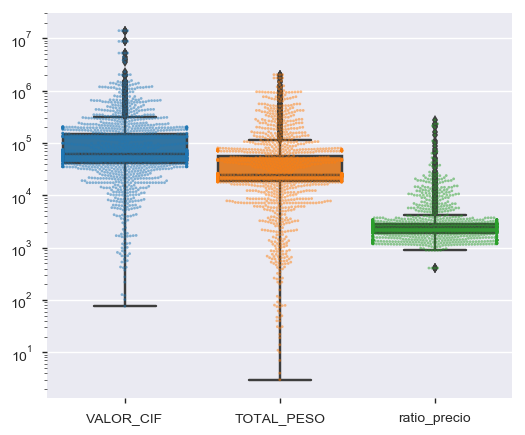

In [28]:
f, ax = plt.subplots(figsize=(6, 5))
ax.set_yscale("log")
sns.swarmplot(data=datos[['VALOR_CIF', 'TOTAL_PESO', 'ratio_precio']], size=2, alpha=0.5)
sns.boxplot(data=datos[['VALOR_CIF', 'TOTAL_PESO', 'ratio_precio']])

<a id='conversion_fechas'></a>
Vamos a poner las fechas para el análisis que queremos hacer

In [22]:
from datetime import datetime
from datetime import timedelta

In [23]:
datos['FECHA_ACEPTACION'] = datos['FECHA_ACEPTACION'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S'))

In [24]:
datos['year'] = datos['FECHA_ACEPTACION'].apply(lambda x: x.year)
datos['month'] = datos['FECHA_ACEPTACION'].apply(lambda x: x.month)
fecha_ini = min(datos.FECHA_ACEPTACION)
dif = datos.FECHA_ACEPTACION - fecha_ini
datos['fecha'] = [x.days for x in list(dif)]

<a id='filtrado_rango'></a>
Filtramos el rango, para quitar **outliers**, sabiendo que este valor debe estar habitualmente entre 1000 y 3000

In [25]:
datos_enrango =  datos[(datos.ratio_precio>1000) & (datos.ratio_precio<3000)].copy()

Quitamos duplicados, usando la variable "VALOR_CIF" y sustituimos los "null" de "Exporter"

In [26]:
datos_enrango_drop = datos_enrango.drop_duplicates(subset=['VALOR_CIF']).copy()
datos_enrango_drop.loc[datos_enrango_drop.Exporter.isnull(),'Exporter'] = ' '

Y finalmente corrijo unos nombres de exportadores que estaban escritos de distinta forma en distintas operaciones

In [27]:
datos_enrango_drop.loc[['NANJIN' in x for x in datos_enrango_drop.Exporter.values], 'Exporter'] = 'NANJING'
datos_enrango_drop.loc[['ZHEJIAN' in x for x in datos_enrango_drop.Exporter.values], 'Exporter'] = 'ZHEJIANG'
datos_enrango_drop.loc[['INGENIEROS LTDA' in x for x in datos_enrango_drop.NOMBRE_IMPORTADOR.values], 'NOMBRE_IMPORTADOR'] = 'A.J. INGENIEROS LTDA'
datos_enrango_drop.loc[['KOPPERS' in x for x in datos_enrango_drop.NOMBRE_IMPORTADOR.values], 'NOMBRE_IMPORTADOR'] = 'ING  Y CONST SIGDO KOPPERS S.A'

In [28]:
dataset = datos_enrango_drop.copy()

<a id='pandas_profiling2'></a>

In [36]:
pp.ProfileReport(dataset)

Number of variables,22
Number of observations,750
Total Missing (%),0.0%
Total size in memory,129.0 KiB
Average record size in memory,176.1 B
Numeric,6
Categorical,11
Boolean,0
Date,1
Text (Unique),0
Rejected,4


<a id='acero_zinc'></a>
Vamos a usar también información del precio del Acero y del Zinc en los siguientes análisis, por lo que cargo una tabla con un histórico de valores

In [29]:
commodities = pd.read_csv('./data/Precios Acero y Zinc.csv', sep=';')
commodities.dropna(inplace=True)

In [38]:
commodities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 6 columns):
Date2        111 non-null object
Fecha        111 non-null float64
Zinc         111 non-null float64
Steel        111 non-null float64
Zinc_100     111 non-null float64
Steel_100    111 non-null float64
dtypes: float64(5), object(1)
memory usage: 6.1+ KB


In [39]:
   commodities.head()

,Date2,Fecha,Zinc,Steel,Zinc_100,Steel_100
0,15/01/2007,3.0,3786.7,790.0,100.0,100.0
1,15/02/2007,34.0,3309.5,790.0,87.4,100.0
2,15/03/2007,62.0,3271.3,835.0,86.4,105.7
3,15/04/2007,93.0,3557.5,835.0,93.9,105.7
4,15/05/2007,123.0,3831.3,845.0,101.2,107.0


<a id='grafica_importes_pesos_precio'></a>
## Gráfica de Importes, Pesos y Precio

In [30]:
from sklearn import linear_model

In [31]:
clf = linear_model.LinearRegression()
x = np.array(dataset.fecha).reshape((750,1))
y = np.array(dataset.ratio_precio).reshape((750,1))
clf.fit(x, y)
predict = clf.predict(x).reshape((1,750))

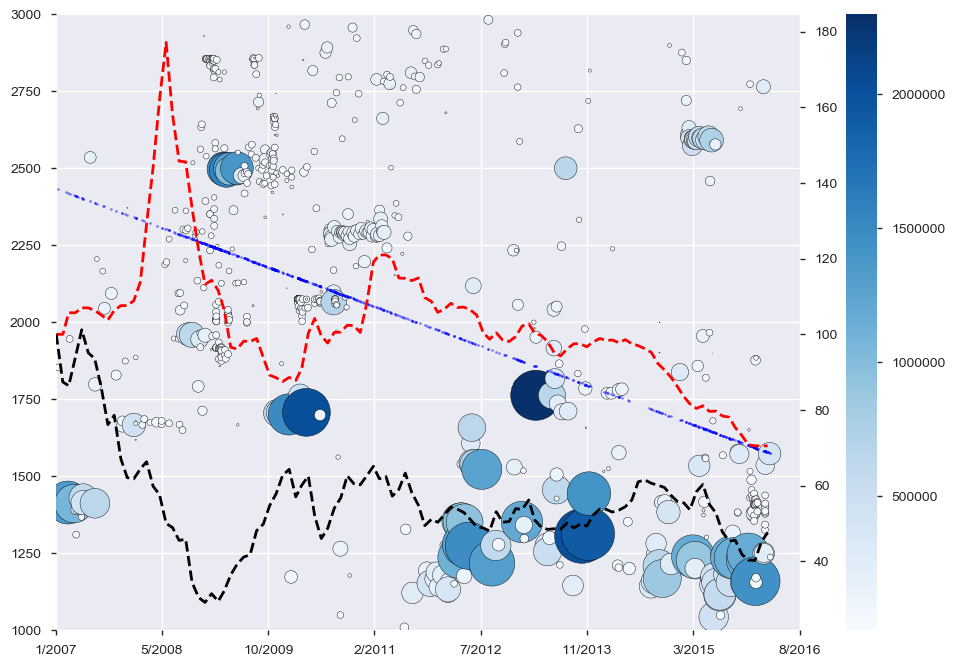

In [42]:
f, ax = plt.subplots(figsize=(12, 8))
ax = plt.scatter(x=dataset.fecha,
                 y=dataset.ratio_precio,
                 s=dataset.TOTAL_PESO/1000,
                 c=dataset.VALOR_CIF.values,
                 cmap='Blues', edgecolors='black')

ax.axes.grid(True)
ax.axes.axis([0,3500,1000,3000])

locs, labels = plt.xticks()

labels_n = [int(x) for x in locs]
labels_n2 = [fecha_ini+timedelta(days=x) for x in labels_n]
labels_n3 = [(str(x.month)+'/'+str(x.year)) for x in labels_n2]

plt.xticks(locs, labels_n3)
plt.colorbar()

ax2 = ax.axes.twinx()
ax2.grid(False)

ax2.axes.plot(commodities.Fecha, commodities.Steel_100, color='r', ls='--', linewidth=2.)
ax2.axes.plot(commodities.Fecha, commodities.Zinc_100, color='black', ls='--', linewidth=2.)

ax.axes.scatter(x = x.reshape((1,750)), y=predict, color='b', alpha=0.5, s=2)

<a id='grafica_exportadores_pesos_precio'></a>
## Gráfica de Exportadores, Pesos y Precio

In [32]:
import matplotlib as mpl
import matplotlib.cm as cm

<a id='tabla_pivot'></a>
Vamos a hacer una tabla **pivot**, como las tablas dinámicas de excel, de los exportadores, agregando los valores de las mercancías tras previamente haber agrupado por años

In [33]:
tabla_exp = dataset.pivot_table('VALOR_CIF', index=['Exporter'], columns=['year'], aggfunc='sum').fillna(0)

In [45]:
tabla_exp.head()

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Exporter,,,,,,,,,,
,0.0,42476.0,114293.0,56742.0,11504.0,1240125.0,1012554.0,20176.0,85449.0,694672.0
ALGRUSA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177344.0,0.0
ANHUI TEC TOWER,0.0,0.0,0.0,15806.0,0.0,0.0,0.0,0.0,0.0,0.0
BRAMETAL,4830351.0,4156881.0,13797110.0,3176897.0,0.0,0.0,0.0,0.0,317387.0,344122.0
CATIC BEIJING,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29447.0,0.0


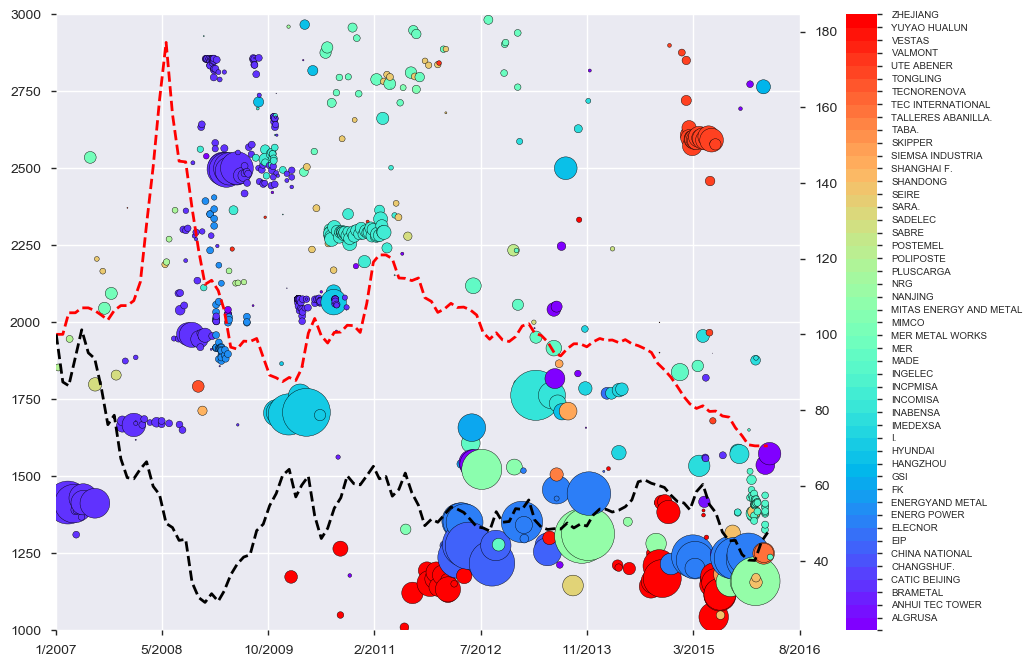

In [46]:
exporter_red = list(tabla_exp.index)

colors = plt.cm.rainbow(np.linspace(0, 1, len(exporter_red)))
df_exporter_red = pd.DataFrame(exporter_red)

colors_datos = np.zeros((len(dataset),4))
i=0
for ix in dataset.index:
    exporter = dataset['Exporter'][ix]
    cod = df_exporter_red[df_exporter_red.iloc[:,0] == exporter].index.item()
    colors_datos[i] = colors[cod]
    i+=1

cmap = mpl.cm.rainbow

f, ax = plt.subplots(figsize=(12, 8))
ax = plt.scatter(x=dataset.fecha, 
                 y=dataset.ratio_precio,
                 s=dataset.TOTAL_PESO/1000, 
                 c=colors_datos,
                 cmap=cmap, edgecolors='black')
ax.axes.grid(True)
ax.axes.axis([0,3500,1000,3000])

locs, labels = plt.xticks()

labels_n = [int(x) for x in locs]
labels_n2 = [fecha_ini+timedelta(days=x) for x in labels_n]
labels_n3 = [(str(x.month)+'/'+str(x.year)) for x in labels_n2]

plt.xticks(locs, labels_n3)

bounds = list(df_exporter_red.index)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(list(df_exporter_red.index))
cax = plt.colorbar(m)

cax.set_ticks(list(df_exporter_red.index))
cax.ax.set_yticklabels(exporter_red, size=7)

ax2 = ax.axes.twinx()
ax2.grid(False)

ax2.axes.plot(commodities.Fecha, commodities.Steel_100, color='r', ls='--', linewidth=2.)
ax2.axes.plot(commodities.Fecha, commodities.Zinc_100, color='black', ls='--', linewidth=2.)

<a id='mayores_exportadores'></a>
## Vamos a ver quiénes son los mayores exportadores

In [47]:
dataset.groupby('Exporter')['VALOR_CIF'].sum().sort_values(ascending=False)[0:25]

Exporter
BRAMETAL                  26622748.0
ELECNOR                   17049030.0
ZHEJIANG                  10572518.0
UTE ABENER                 9642146.0
INCOMISA                   9460889.0
NANJING                    8606425.0
HYUNDAI                    8383936.0
CHINA NATIONAL             7698522.0
INABENSA                   3375743.0
                           3277991.0
MER                        2690259.0
SKIPPER                    2563684.0
ENERG POWER                2317179.0
MITAS ENERGY AND METAL     2073076.0
HANGZHOU                   2014557.0
MADE                       1692309.0
INGELEC                    1644511.0
IMEDEXSA                   1326598.0
SEIRE                      1064340.0
I.                          911463.0
FK                          655061.0
SHANDONG                    557295.0
TEC INTERNATIONAL           545390.0
INCPMISA                    522868.0
MER METAL WORKS             497454.0
Name: VALOR_CIF, dtype: float64

<a id='paises_origen_importaciones'></a>
## Y cuáles son los Países de Origen de estas importaciones

In [48]:
dataset.groupby('Pais_Origen')['VALOR_CIF'].sum().sort_values(ascending=False)

Pais_Origen
CHINA            51929925.0
BRASIL           40523549.0
MEXICO            9470458.0
COREA DEL SUR     7365995.0
ESPAÑA            5755521.0
TURQUIA           3631482.0
ISRAEL            3187713.0
INDIA             2563684.0
ARGENTINA         1498208.0
VIETNAM           1050681.0
PORTUGAL           860629.0
COLOMBIA           369100.0
U.S.A.             306722.0
PERU               224241.0
POLONIA            167860.0
Name: VALOR_CIF, dtype: float64

<a id='merge_dataset'></a>
Y ahora vamos a unir los datasets de importaciones con el de los precios del acero y del zinc. Para ello necesitamos una clave de unión.
Podemos hacerlo por fechas, pero tenemos que transformarlas, pues el dataframe commodities usa meses y el dataframe de importaciones tiene mayor resolución (fecha y hora).

In [35]:
commodities['ym'] = commodities.Date2.apply(lambda x: x[6:10]).astype(np.int)*100 + commodities.Date2.apply(lambda x: x[3:5]).astype(np.int)

In [36]:
dataset['ym'] = dataset.FECHA_ACEPTACION.apply(lambda x: x.year).astype(np.int)*100 + dataset.FECHA_ACEPTACION.apply(lambda x: x.month).astype(np.int)

Una vez hecha la tranformación de las fechas en ambos dataframes, usamos es nueva variable (**ym**) como clave para hacer el **merge**

In [37]:
dataset_merge = dataset.merge(commodities, how='left', on='ym')

In [52]:
dataset_merge.head()

,FECHA_ACEPTACION,TOTAL_PESO,VALOR_CIF,CODIGO_ARANCEL,NOMBRE_IMPORTADOR,REGIMEN_IMPORTACION,NRO_TOTAL_ITEMS,VALOR_SEGURO,identificacion,descripcion,...,year,month,fecha,ym,Date2,Fecha,Zinc,Steel,Zinc_100,Steel_100
0,2007-01-25 17:26:27,25139.0,46601.0,73082000,A.J. INGENIEROS LTDA,72,1,161,AJ.INGENIEROS LTDA,SIN-CODIGO ; MONOPOSTES(TORRES DE TELEFONIA;PO...,...,2007,1,13,200701,15/01/2007,3.0,3786.7,790.0,100.0,100.0
1,2007-03-01 13:45:09,106489.0,150791.0,73082000,ALUSA INGENIERIA LIMITDA,72,5,302,SUDU 362906-4 TGHU 219527-5 SUDU 182167-4 CLHU...,CTS1H22 ; TORRE DE ALTA TENSION; BRAMETAL-F; C...,...,2007,3,47,200703,15/03/2007,62.0,3271.3,835.0,86.4,105.7
2,2007-03-12 16:32:43,955090.0,1351613.0,73082000,ALUSA INGENIERIA LIMITDA,72,2,"2,703",SUDU378607-9/SUDU376920-9/SUDU377136-1 SUDU185...,H25CTS1 ; TORRE DE ALTA TENSION; BRAMETAL-F; C...,...,2007,3,58,200703,15/03/2007,62.0,3271.3,835.0,86.4,105.7
3,2007-03-20 16:39:21,25214.0,49075.0,73082000,A.J. INGENIEROS LTDA,72,1,135,AJ INGENIEROS LTDA,SIN-CODIGO ; MONOPOSTES(TORRES DE TELEFONIA);P...,...,2007,3,66,200703,15/03/2007,62.0,3271.3,835.0,86.4,105.7
4,2007-04-09 11:52:43,767376.0,1083361.0,73082000,ALUSA INGENIERIA LIMITDA,72,6,"2,167",SUDU173158-6/SUDU172784-2/SUDU367650-7 SUDU348...,H25CTS8 ; TORRE DE ALTA TENSION; BRAMETAL-F; C...,...,2007,4,86,200704,15/04/2007,93.0,3557.5,835.0,93.9,105.7


In [53]:
pp.ProfileReport(dataset_merge)

Number of variables,28
Number of observations,750
Total Missing (%),0.0%
Total size in memory,167.0 KiB
Average record size in memory,228.0 B
Numeric,8
Categorical,12
Boolean,0
Date,1
Text (Unique),0
Rejected,7


<a id='grafica_pairgrid'></a>
Podemos hacer una visualización con **Seaborn** que compara variables (**PairGrid**)

C:\Users\Lenovo-PC\Anaconda3\envs\datahack\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


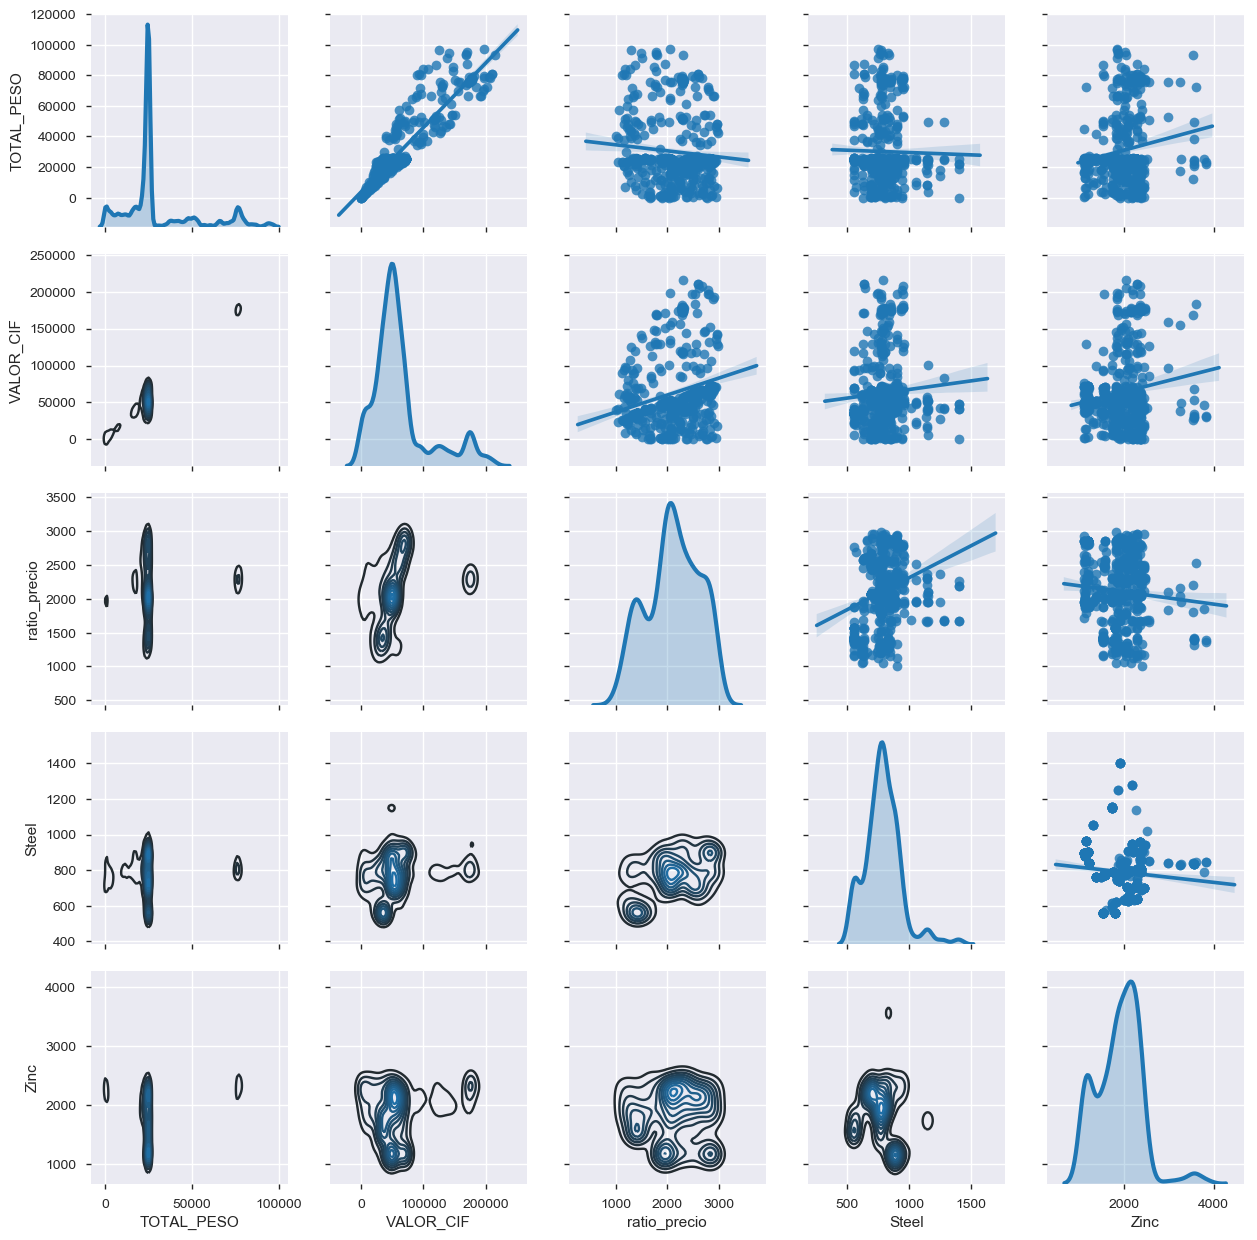

In [54]:
g = sns.PairGrid(dataset_merge.loc[dataset_merge.TOTAL_PESO<100000,['TOTAL_PESO', 'VALOR_CIF', 'ratio_precio', 'Steel', 'Zinc']], diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3, shade=True)

Con esto ya terminamos por hoy, se trataba de una **introducción al análisis de datos con Python**, paso previo a una modelización con Aprendizaje Automático (**Marchine Learning**)

![Muchas Gracias](images/muchas_gracias.PNG)